In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [6]:
from sklearn.datasets import load_diabetes

diabetes_datasets = load_diabetes()

diabetes = pd.DataFrame(diabetes_datasets.data,columns=diabetes_datasets.feature_names)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
diabetes['Measure'] = diabetes_datasets.target

In [8]:
diabetes.isnull().sum()

age        0
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
Measure    0
dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_472\732410350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes['Measure'],bins = 50)


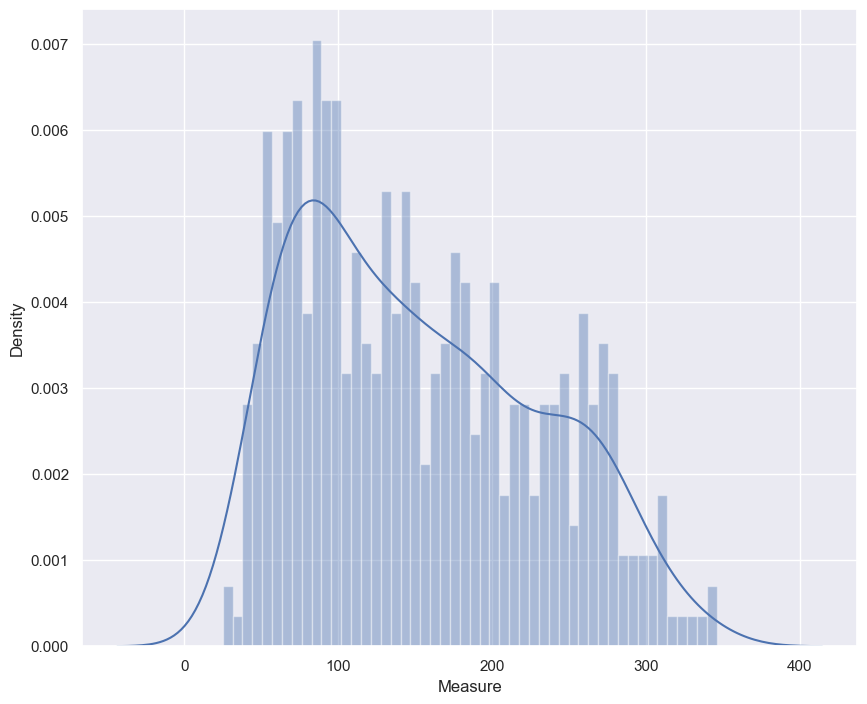

In [13]:
sns.set(rc={'figure.figsize':(10,8.27)})
sns.distplot(diabetes['Measure'],bins = 50)
plt.show()

In [14]:
correlation_matrix = diabetes.corr().round(2)

<Axes: >

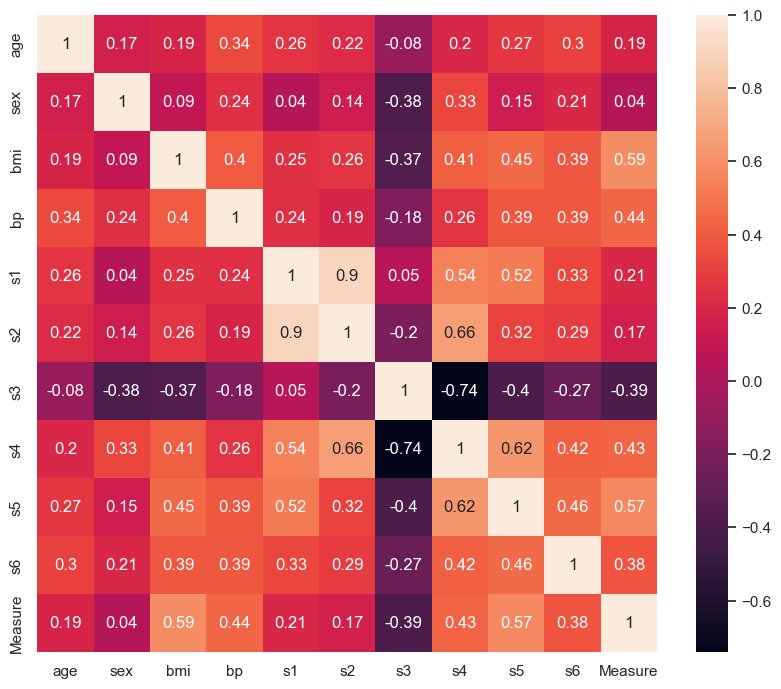

In [15]:
sns.heatmap(data = correlation_matrix,annot =True)

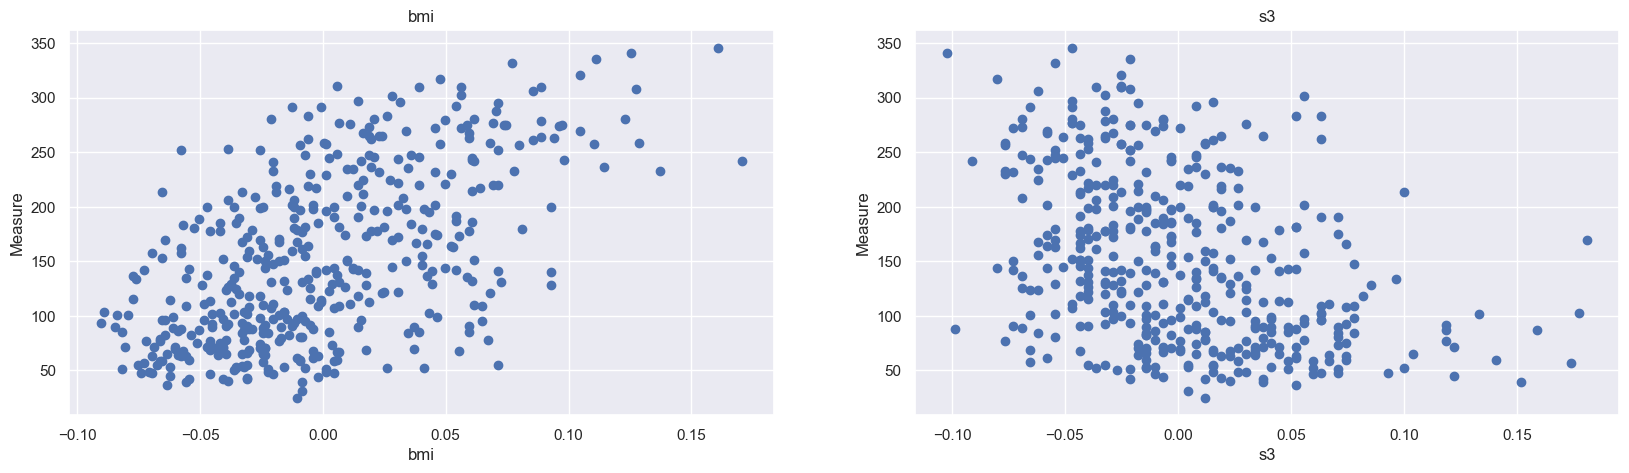

In [16]:
plt.figure(figsize =(20,5))

features = ['bmi','s3']
target = diabetes['Measure']

for i,col in enumerate(features):
     plt.subplot(1,len(features),i+1)
     x = diabetes[col]
     y = target
     plt.scatter(x,y,marker='o')
     plt.title(col)
     plt.xlabel(col)
     plt.ylabel('Measure')

In [17]:
X = pd.DataFrame(np.c_[diabetes['bmi'],diabetes['s3']],columns=['bmi','s3'])
Y = diabetes['Measure']
print("X",X)

X           bmi        s3
0    0.061696 -0.043401
1   -0.051474  0.074412
2    0.044451 -0.032356
3   -0.011595 -0.036038
4   -0.036385  0.008142
..        ...       ...
437  0.019662 -0.028674
438 -0.015906 -0.028674
439 -0.015906 -0.024993
440  0.039062 -0.028674
441 -0.073030  0.173816

[442 rows x 2 columns]


In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 2)
(89, 2)
(353,)
(89,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [22]:
#trainning test
y_train_predit = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predit)))
r2 = r2_score(Y_train,y_train_predit)

print("The model performance for trainning set")
print("--------------------------------")
print("RMSE is {}".format(rmse))
print("r2 score is {}".format(r2))
print("\n")

#testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2 = r2_score(Y_test,y_test_predict)
print("The model performance for testting set")
print("--------------------------------")
print("RMSE is {}".format(rmse))
print("r2 score is {}".format(r2))
print("\n")

The model performance for trainning set
--------------------------------
RMSE is 59.7066003197657
r2 score is 0.3879586720499696


The model performance for testting set
--------------------------------
RMSE is 63.93488569128075
r2 score is 0.3517444631469917




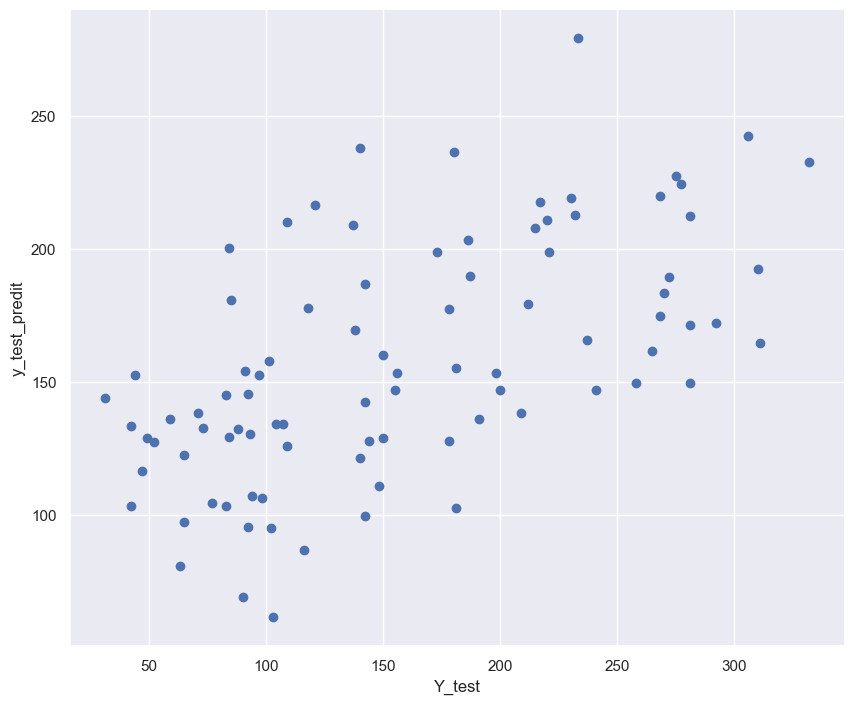

In [27]:
plt.scatter(Y_test,y_test_predict,marker='o')
plt.xlabel('Y_test')
plt.ylabel('y_test_predit')
plt.show()

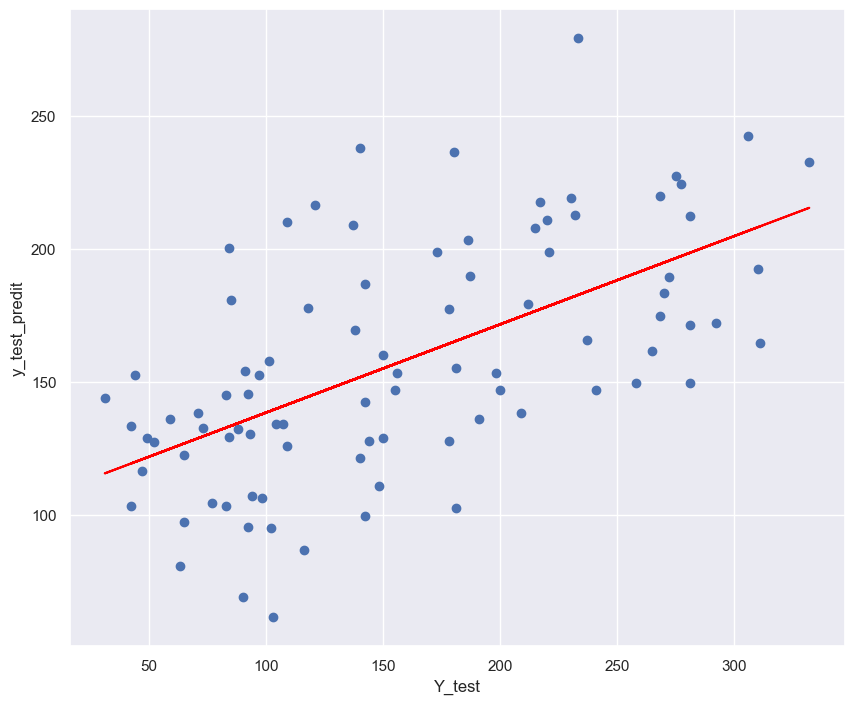

In [35]:
coefficients = np.polyfit(Y_test,y_test_predict,1)
polynomial = np.poly1d(coefficients)
plt.scatter(Y_test,y_test_predict,marker='o')
# Vẽ đường tiếp tuyến
plt.plot(Y_test, polynomial(Y_test), color='red', label='Tangent Line')
plt.xlabel('Y_test')
plt.ylabel('y_test_predit')
plt.show()

In [28]:
check =np.c_[Y_test,y_test_predict]
print(check)

[[281.         171.31558826]
 [332.         232.81672943]
 [178.         127.72665271]
 [155.         146.96253867]
 [137.         208.92810093]
 [ 65.         122.22318245]
 [ 31.         143.74424956]
 [275.         227.54333684]
 [138.         169.29740914]
 [173.         198.69377366]
 [ 90.          68.78622625]
 [221.         198.88692697]
 [198.         153.1278491 ]
 [ 88.         132.19050769]
 [268.         219.70922955]
 [107.         134.20442105]
 [ 83.         145.1005885 ]
 [ 63.          80.61550166]
 [ 65.          97.09325384]
 [ 93.         130.40240624]
 [103.          61.42507158]
 [144.         127.76784283]
 [156.         153.08665899]
 [ 84.         200.35830475]
 [ 42.         133.15627426]
 [181.         102.52287539]
 [233.         279.27457183]
 [109.         210.21059116]
 [ 92.          95.19864508]
 [101.         157.817516  ]
 [ 71.         138.23651353]
 [140.         121.17503565]
 [150.         128.93102846]
 [ 49.         128.65976067]
 [109.        

In [39]:
from scipy.stats import jarque_bera

# Dữ liệu cần kiểm tra
data = diabetes['bmi']

# Thực hiện kiểm định Jarque-Bera
jb_stat, jb_p_value = jarque_bera(data)

# In kết quả
print("Jarque-Bera statistic:", jb_stat)
print("p-value:", jb_p_value)

# So sánh với ngưỡng alpha (ví dụ, alpha = 0.05)
alpha = 0.05
if jb_p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis. The data follows a normal distribution.")


Jarque-Bera statistic: 63.60295127774273
p-value: 1.544523831307274e-14
Reject the null hypothesis. The data does not follow a normal distribution.


In [40]:
from sklearn.preprocessing import PolynomialFeatures
def create_poly_model(degree):
     poly_features = PolynomialFeatures(degree = degree)

     X_train_poly = poly_features.fit_transform(X_train)
     poly_model = LinearRegression()
     poly_model.fit(X_train_poly,Y_train)

     y_train_predicted = poly_model.predict(X_train_poly)

     y_test_predict =poly_model.predict(poly_features.fit_transform(X_test))

       # evaluating the model on training dataset
     rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
     r2_train = r2_score(Y_train, y_train_predicted)
  
     # evaluating the model on test dataset
     rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
     r2_test = r2_score(Y_test, y_test_predict)
  
     print("The model performance for the training set")
     print("-------------------------------------------")
     print("RMSE of training set is {}".format(rmse_train))
     print("R2 score of training set is {}".format(r2_train))
  
     print("\n")
  
     print("The model performance for the test set")
     print("-------------------------------------------")
     print("RMSE of test set is {}".format(rmse_test))
     print("R2 score of test set is {}".format(r2_test))

create_poly_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 59.441162856433955
R2 score of training set is 0.39338847631255214


The model performance for the test set
-------------------------------------------
RMSE of test set is 63.87928282498499
R2 score of test set is 0.3528715220854455


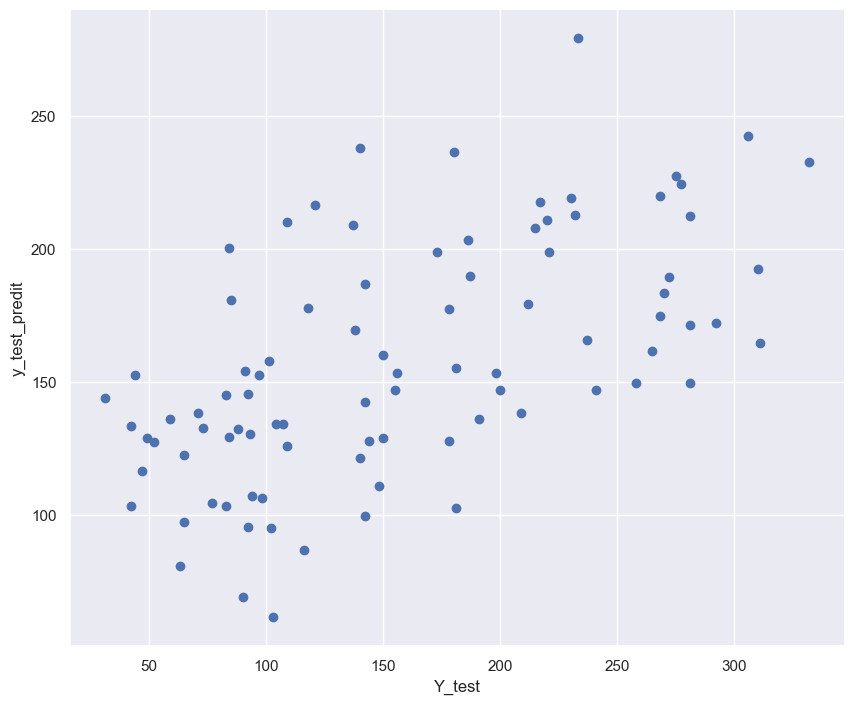

In [41]:
plt.scatter(Y_test,y_test_predict,marker='o')
plt.xlabel('Y_test')
plt.ylabel('y_test_predit')
plt.show()